# [Data Science in Visual Studio Code](https://code.visualstudio.com/docs/python/data-science-tutorial)

This tutorial demonstrates using Visual Studio Code and the Microsoft Python extension with common data science libraries to explore a basic data science scenario. Specifically, using passenger data from the Titanic, you will learn how to set up a data science environment, import and clean data, create a machine learning model for predicting survival on the Titanic, and evaluate the accuracy of the generated model.


In [2]:
import pandas as pd
import numpy as np
data = pd.read_csv('data.csv')

In [3]:
data.replace('?', np.nan, inplace= True)
data = data.astype({"age": np.float64, "fare": np.float64})

7. Now that the data is in good shape, you can use seaborn and matplotlib to view how certain columns of the dataset relate to survivability. Add the following code to the next cell in your notebook and run it to see the generated plots.

<AxesSubplot:xlabel='survived', ylabel='fare'>

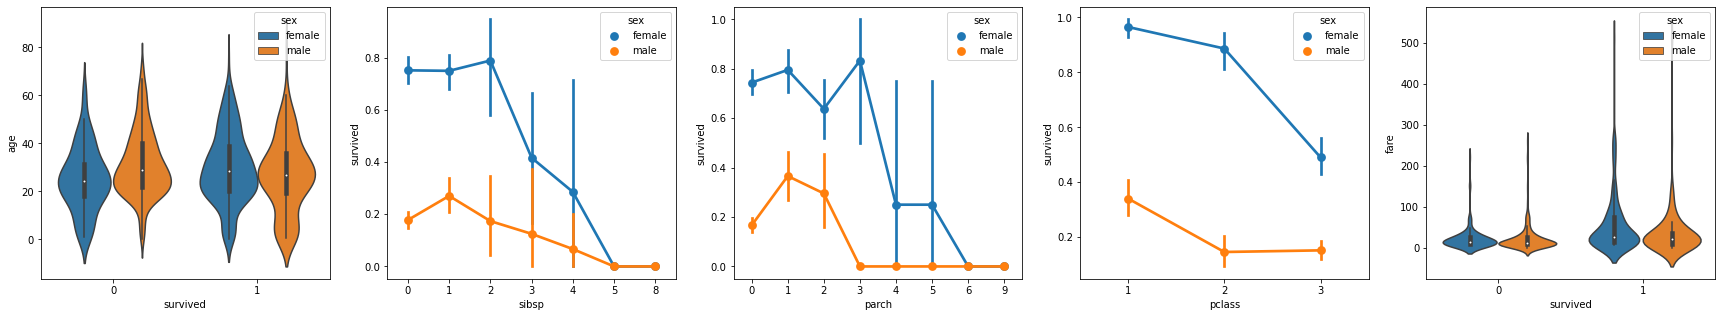

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, axs = plt.subplots(ncols=5, figsize=(30,5))
sns.violinplot(x="survived", y="age", hue="sex", data=data, ax=axs[0])
sns.pointplot(x="sibsp", y="survived", hue="sex", data=data, ax=axs[1])
sns.pointplot(x="parch", y="survived", hue="sex", data=data, ax=axs[2])
sns.pointplot(x="pclass", y="survived", hue="sex", data=data, ax=axs[3])
sns.violinplot(x="survived", y="fare", hue="sex", data=data, ax=axs[4])

8. These graphs are helpful in seeing some of the relationships between survival and the input variables of the data, but it's also possible to use pandas to calculate correlations. To do so, all the variables used need to be numeric for the correlation calculation and currently gender is stored as a string. To convert those string values to integers, add and run the following code.

9. Now, you can analyze the correlation between all the input variables to identify the features that would be the best inputs to a machine learning model. The closer a value is to 1, the higher the correlation between the value and the result. Use the following code to correlate the relationship between all variables and survival.

In [5]:
data.replace({'male': 1, 'female': 0}, inplace=True)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265


10. 
Looking at the correlation results, you'll notice that some variables like gender have a fairly high correlation to survival, while others like relatives (sibsp = siblings or spouse, parch = parents or children) seem to have little correlation.

Let's hypothesize that sibsp and parch are related in how they affect survivability, and group them into a new column called "**relatives**" to see whether the combination of them has a higher correlation to survivability. To do this, you will check if for a given passenger, the number of *sibsp* and _parch_ is greater than 0 and, if so, you can then say that they had a relative on board.

Use the following code to create a new variable and column in the dataset called **relatives** and check the correlation again.

In [6]:
data['relatives'] = data.apply (lambda row: int((row['sibsp'] + row['parch']) > 0), axis=1)
data.corr().abs()[["survived"]]

,survived
pclass,0.312469
survived,1.000000
sex,0.528693
age,0.055513
sibsp,0.027825
parch,0.082660
fare,0.244265
relatives,0.201719


11. You'll notice that in fact when looked at from the standpoint of whether a person had relatives, versus how many relatives, there is a higher correlation with survival. With this information in hand, you can now drop from the dataset the low value sibsp and parch columns, as well as any rows that had NaN values, to end up with a dataset that can be used for training a model.

*Note: Although age had a low direct correlation, it was kept because it seems reasonable that it might still have correlation in conjunction with other inputs.*

In [7]:
data = data[['sex', 'pclass','age','relatives','fare','survived']].dropna()